In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



df = pd.read_csv('/content/Titanic-Dataset.csv')  # Correct way to load local CSV
df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
###Initial Data Exploration###

# Structure and data types
df.info()

# Statistical summary for numerical columns
df.describe()

# Summary for categorical columns
df.describe(include='object')

# Count missing values per column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


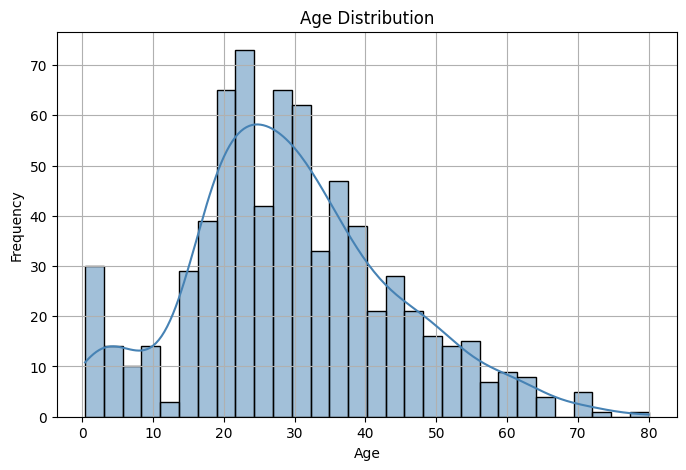

In [10]:
#Univariate Analysis (Single Variable)
#3.1 Distribution of Age

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), kde=True, bins=30, color='steelblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


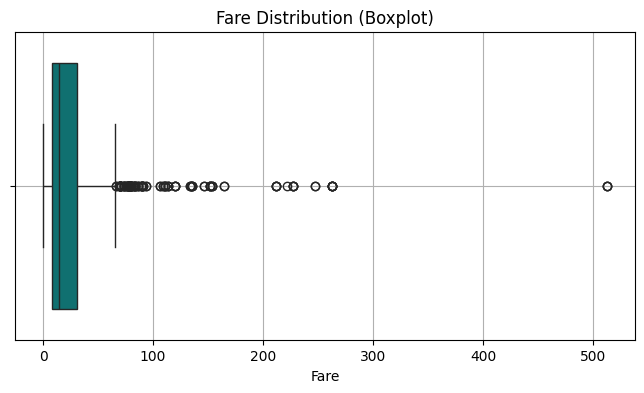

In [12]:
#FARE BOXPLOT
plt.figure(figsize=(8, 4))
sns.boxplot(x='Fare', data=df, color='teal')
plt.title('Fare Distribution (Boxplot)')
plt.xlabel('Fare')
plt.grid(True)
plt.show()


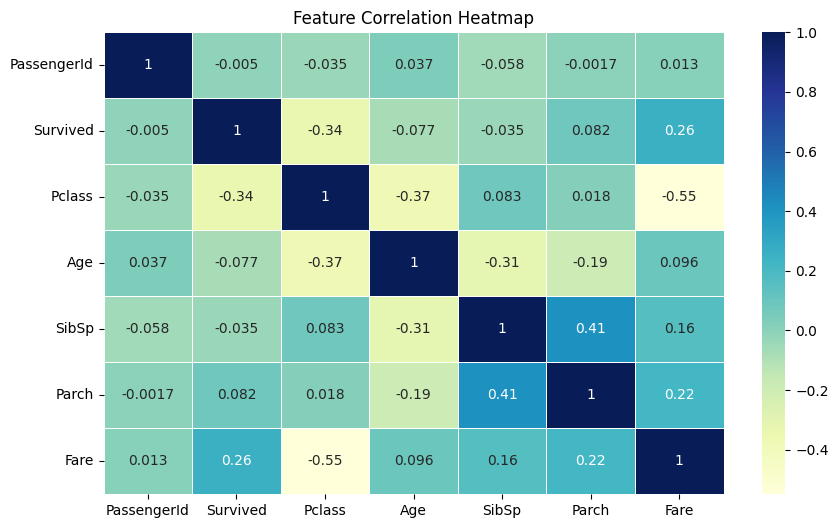

In [13]:
#Multivariate Analysis (Feature Relationships)
#4.1 Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


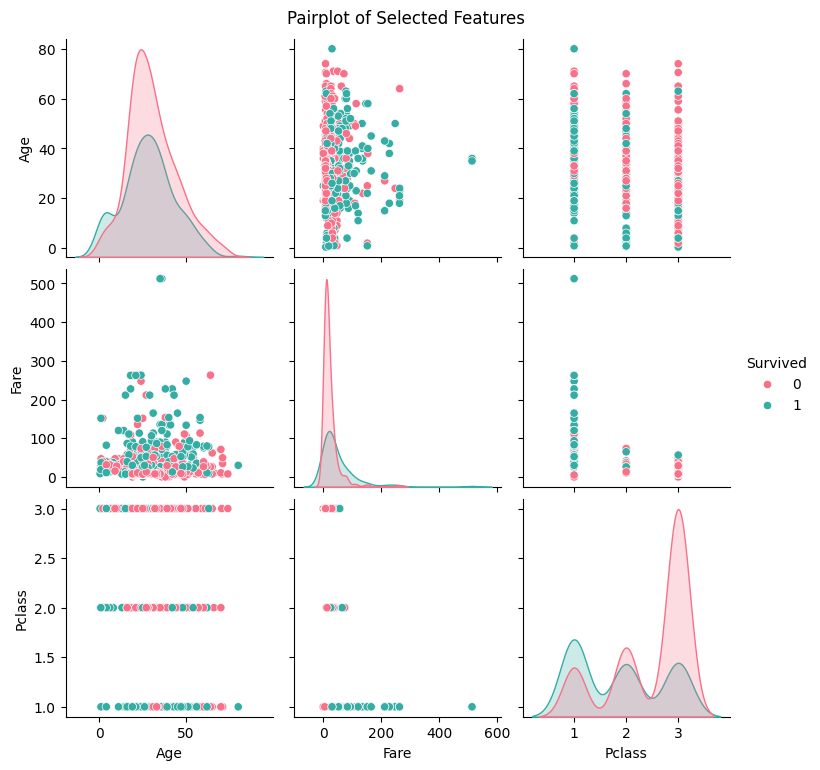

In [15]:
#4.2 PAIR PLOT OF KEY FEATURES

sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


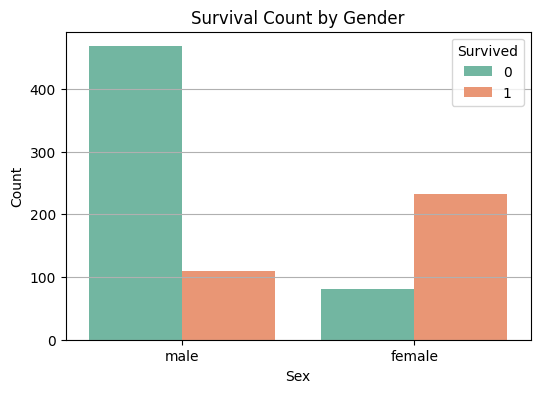

In [16]:
# 5. Categorical Analysis
#5.1 Survival by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()



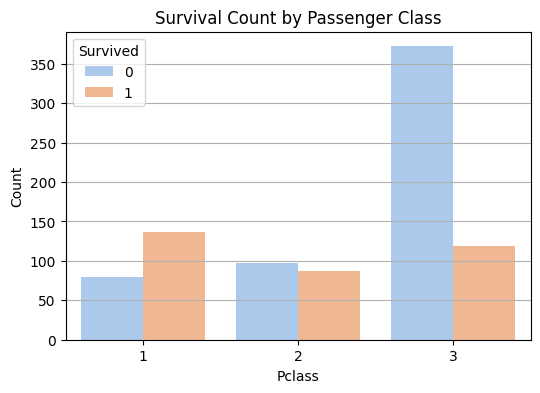

In [18]:
#5.2 Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='pastel')
plt.title('Survival Count by Passenger Class')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()



In [19]:
#6. Interactive Plot: Age vs Survival
fig = px.histogram(df, x='Age', color='Survived', nbins=30,
                   title='Age Distribution Grouped by Survival Status',
                   labels={'Survived': 'Survived (0 = No, 1 = Yes)'})
fig.update_layout(bargap=0.1)
fig.show()


In [20]:
from IPython.display import Markdown, display

note = """
###  **Note: Key Insights from Titanic Dataset EDA**

- **Females had significantly higher survival rates** compared to males.
- **1st class passengers** had a better chance of survival than 2nd and 3rd class passengers.
- **Younger passengers**, especially children, were more likely to survive.
- **Passengers who paid higher fares** tended to survive more, likely due to their class and cabin location.
- **Missing values** are present in the `Age`, `Cabin`, and `Embarked` columns — they need to be handled during data preprocessing.
"""

display(Markdown(note))



###  **Note: Key Insights from Titanic Dataset EDA**

- **Females had significantly higher survival rates** compared to males.  
- **1st class passengers** had a better chance of survival than 2nd and 3rd class passengers.  
- **Younger passengers**, especially children, were more likely to survive.  
- **Passengers who paid higher fares** tended to survive more, likely due to their class and cabin location.  
- **Missing values** are present in the `Age`, `Cabin`, and `Embarked` columns — they need to be handled during data preprocessing.
